# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2021**

![Images/Sampling.gif](Images/Sampling.gif)

---
## Clase 3: Sesgo, normalización y escalado de datos

### Escalado vs Normalización 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_context('talk')

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [2]:
# Generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# Column format only...
original_data = original_data.reshape(-1, 1)

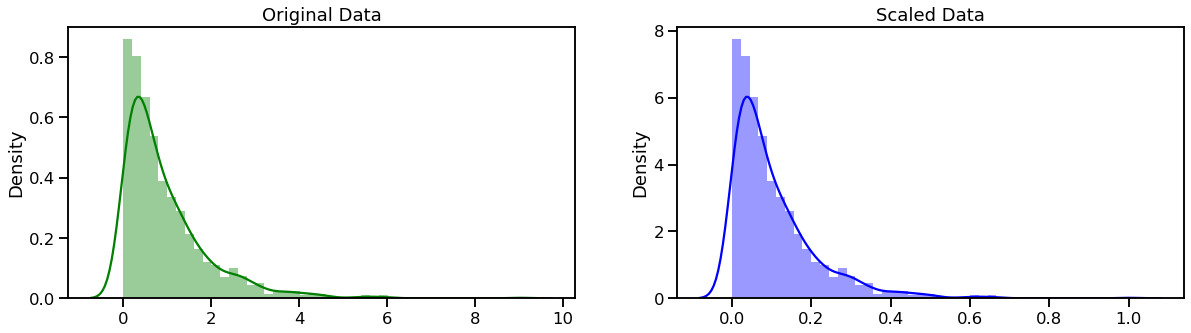

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((0, 1))
scaled_feature = scaler.fit_transform(original_data)

# Plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.distplot(original_data, ax=ax[0], color='Green')
ax[0].set_title("Original Data");

sns.distplot(scaled_feature, ax=ax[1], color='Blue')
ax[1].set_title("Scaled Data");

### Melbourn dataset

In [4]:
melb_data = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')

melb_data.sample(3, random_state=123)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
5799,St Kilda,25/69 Wellington St,2,u,542500.00,PI,McGrath,10/09/2016,6.10,3182.00,...,1.00,1.00,0.00,NaN,NaN,Port Phillip,-37.86,144.99,Southern Metropolitan,13240.00
10596,Broadmeadows,48 Walsh St,3,h,386000.00,S,hockingstuart,8/07/2017,14.00,3047.00,...,1.00,1.00,341.00,71.00,1965.00,Hume,-37.69,144.92,Northern Metropolitan,4294.00
7471,Ascot Vale,17 Monash St,3,h,1230000.00,PI,Nelson,20/05/2017,5.90,3032.00,...,1.00,2.00,538.00,NaN,NaN,Moonee Valley,-37.78,144.91,Western Metropolitan,6567.00


In [5]:
melb_data.shape

(13580, 21)

In [6]:
melb_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.00,13580.00,13580.00,13580.00,13580.00,13580.00,13518.00,13580.00,7130.00,8205.00,13580.00,13580.00,13580.00
mean,2.94,1075684.08,10.14,3105.30,2.91,1.53,1.61,558.42,151.97,1964.68,-37.81,145.00,7454.42
std,0.96,639310.72,5.87,90.68,0.97,0.69,0.96,3990.67,541.01,37.27,0.08,0.10,4378.58
min,1.00,85000.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.18,144.43,249.00
25%,2.00,650000.00,6.10,3044.00,2.00,1.00,1.00,177.00,93.00,1940.00,-37.86,144.93,4380.00
50%,3.00,903000.00,9.20,3084.00,3.00,1.00,2.00,440.00,126.00,1970.00,-37.80,145.00,6555.00
75%,3.00,1330000.00,13.00,3148.00,3.00,2.00,2.00,651.00,174.00,1999.00,-37.76,145.06,10331.00
max,10.00,9000000.00,48.10,3977.00,20.00,8.00,10.00,433014.00,44515.00,2018.00,-37.41,145.53,21650.00


In [7]:
Price = melb_data.Price.values.copy().reshape(-1, 1)

Distance = melb_data.Distance.values.copy().reshape(-1, 1)

### MinMaxScaler & RobustScaler

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

Price_scaled_MM = MinMaxScaler().fit_transform(Price)

Price_scaled_R = RobustScaler().fit_transform(Price)

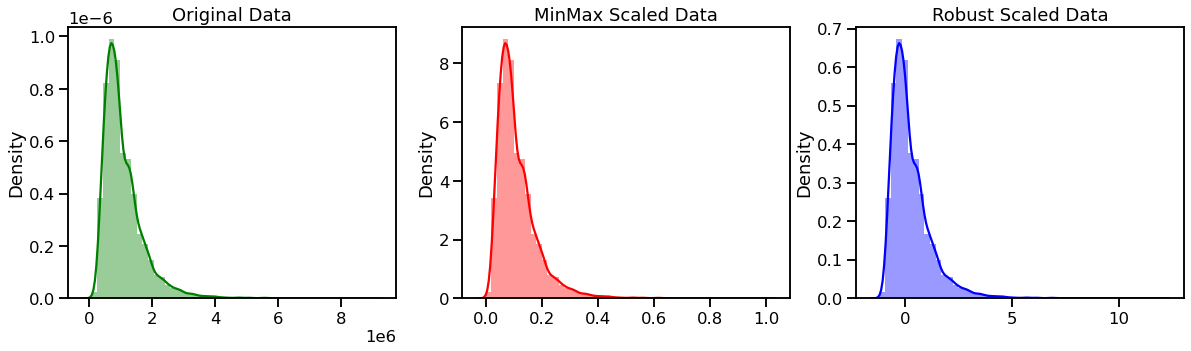

In [9]:
# Plot both together to compare
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.distplot(Price, ax=ax[0], color='Green')
ax[0].set_title("Original Data");

sns.distplot(Price_scaled_MM, ax=ax[1], color='Red')
ax[1].set_title("MinMax Scaled Data");

sns.distplot(Price_scaled_R, ax=ax[2], color='Blue')
ax[2].set_title("Robust Scaled Data");

In [10]:
Distance_scaled_MM = MinMaxScaler().fit_transform(Distance)

Distance_scaled_R = RobustScaler().fit_transform(Distance)

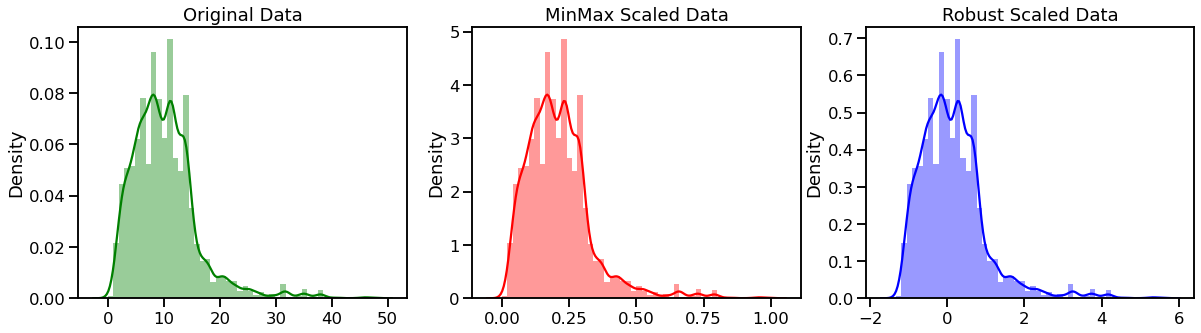

In [11]:
# Plot both together to compare
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.distplot(Distance, ax=ax[0], color='Green')
ax[0].set_title("Original Data");

sns.distplot(Distance_scaled_MM, ax=ax[1], color='Red')
ax[1].set_title("MinMax Scaled Data");

sns.distplot(Distance_scaled_R, ax=ax[2], color='Blue')
ax[2].set_title("Robust Scaled Data");

### Transformación de BoxCox 

Looking at the power parameter **λ** of the *boxcox transformation* you can see that we are able to compress outliers more and more by chosing lower values of **λ**.
In addition we obtain a "negative" stretching of low original values lower than one.
If we fix **λ = 0.5** and vary the constant **c** we can observe only slight differences of the high values compression.
On the other hand, we can see that the stretching of low values is even stronger of constants **c** close to zero.

*Take-away (not that simple but still good)*
- If you like to compress outliers - chose a low  **λ**. 
- If you like to stretch low values - chose a low  **c**, close to zero.

Transform!

Ok, let's go!

If you like, fork and chose other values.
You will see that the resulting clusters highly depend on these hyperparameters!

In [12]:
from scipy.stats import boxcox

to_knead = np.arange(0, 10, 0.1)

to_knead

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

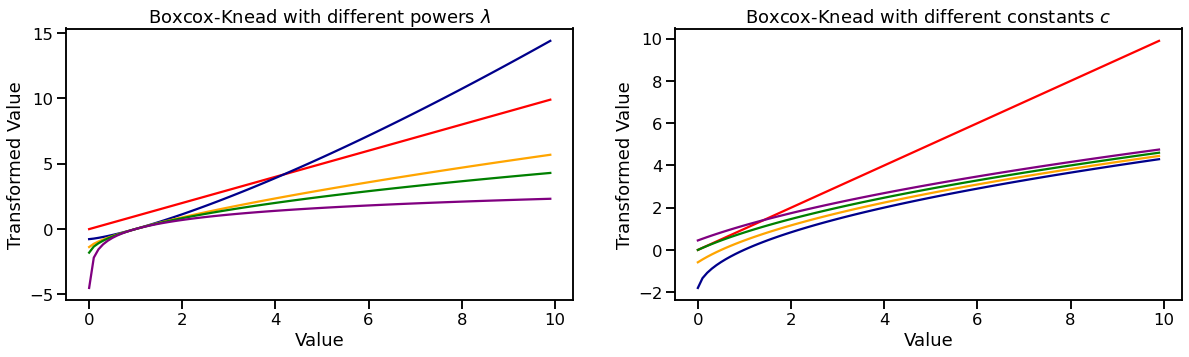

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Identidad
k = ax[0].plot(to_knead, to_knead, color="Red", label="to_knead")

e1 = ax[0].plot(to_knead, boxcox(to_knead + 0.01, 1.3), color="darkblue", label="1.3")
e2 = ax[0].plot(to_knead, boxcox(to_knead + 0.01, 0.7), color="orange", label="0.7")
e3 = ax[0].plot(to_knead, boxcox(to_knead + 0.01, 0.5), color="green", label="0.5")
e4 = ax[0].plot(to_knead, boxcox(to_knead + 0.01, 0.01), color="purple", label="0.01")

ax[0].set_title("Boxcox-Knead with different powers $\lambda$")
ax[0].set_xlabel("Value")
ax[0].set_ylabel("Transformed Value")
handles = [k, e1, e2, e3, e4]

# Identidad
k = ax[1].plot(to_knead, to_knead, color="Red", label="to_knead")

e1 = ax[1].plot(to_knead, boxcox(to_knead + 0.01, 0.5), color="darkblue", label="0.01")
e2 = ax[1].plot(to_knead, boxcox(to_knead + 0.5, 0.5), color="orange", label="0.5")
e3 = ax[1].plot(to_knead, boxcox(to_knead + 1, 0.5), color="green", label="1")
e4 = ax[1].plot(to_knead, boxcox(to_knead + 1.5, 0.5), color="purple", label="1.5")

ax[1].set_title("Boxcox-Knead with different constants $c$")
ax[1].set_xlabel("Value")
ax[1].set_ylabel("Transformed Value")
handles = [k, e1, e2, e3, e4]

### Ejemplo de datos continuos

![Images/Transformacion.png](Images/Transformacion.png)

### Ejercicio: Aplicar BoxCox a la variable `Precio` con diferentes `c` y `λ`. 

- `RobustScaler` y `QuantileTransformer` son más robustos a outliers.
- `Box-Cox` no soporta entradas con valores negativos, por lo que en estas situaciones, se prefiere `Yeo-Johnson`.

#### Con Estandarización

In [14]:
# Transformo el feature en columna
Price = melb_data.Price.values.copy().reshape(-1, 1)

# Escalo el feature al rango [0, 1]
Price_scaled_MM = MinMaxScaler().fit_transform(Price)

# Transformo el feature escalado en fila
Price_BC = np.hstack(Price_scaled_MM)

Price_BC

array([0.15647785, 0.10656197, 0.15479529, ..., 0.12170499, 0.27089176,
       0.1346046 ])

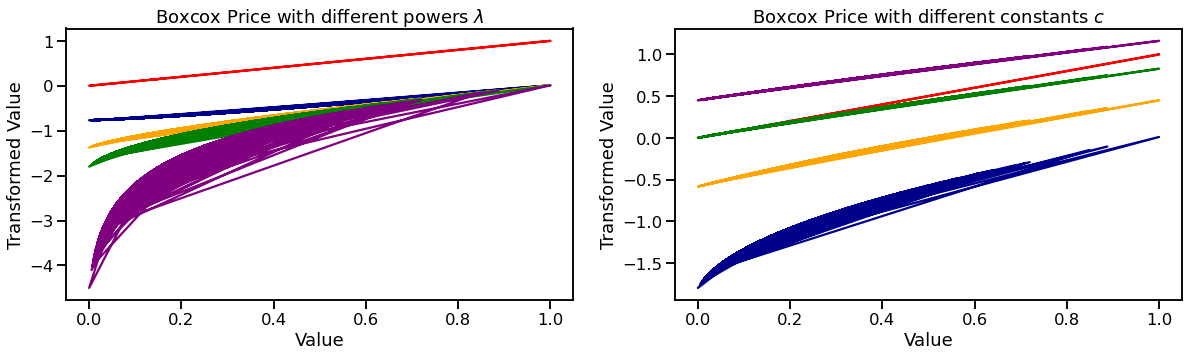

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Identidad
k = ax[0].plot(Price_BC, Price_BC, color="Red", label="to_knead")

e1 = ax[0].plot(Price_BC, boxcox(Price_BC + 0.01, 1.3), color="darkblue", label="1.3")
e2 = ax[0].plot(Price_BC, boxcox(Price_BC + 0.01, 0.7), color="orange", label="0.7")
e3 = ax[0].plot(Price_BC, boxcox(Price_BC + 0.01, 0.5), color="green", label="0.5")
e4 = ax[0].plot(Price_BC, boxcox(Price_BC + 0.01, 0.01), color="purple", label="0.01")

ax[0].set_title("Boxcox Price with different powers $\lambda$")
ax[0].set_xlabel("Value")
ax[0].set_ylabel("Transformed Value")
handles = [k, e1, e2, e3, e4]

# Identidad
k = ax[1].plot(Price_BC, Price_BC, color="Red", label="to_knead")

e1 = ax[1].plot(Price_BC, boxcox(Price_BC + 0.01, 0.5), color="darkblue", label="0.01")
e2 = ax[1].plot(Price_BC, boxcox(Price_BC + 0.5, 0.5), color="orange", label="0.5")
e3 = ax[1].plot(Price_BC, boxcox(Price_BC + 1, 0.5), color="green", label="1")
e4 = ax[1].plot(Price_BC, boxcox(Price_BC + 1.5, 0.5), color="purple", label="1.5")

ax[1].set_title("Boxcox Price with different constants $c$")
ax[1].set_xlabel("Value")
ax[1].set_ylabel("Transformed Value")
handles = [k, e1, e2, e3, e4]

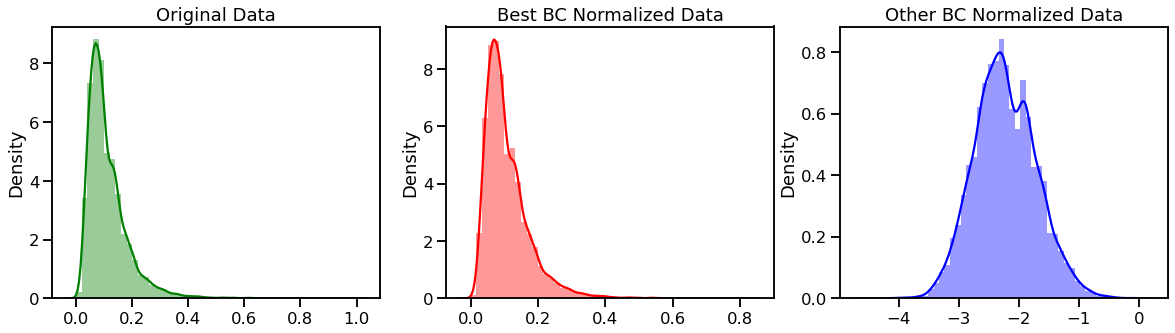

In [16]:
# Veamos que tan normal es la distribución
Best_BC = boxcox(Price_BC + 1, 0.5)
Other_BC = boxcox(Price_BC + 0.01, 0.01)

# Plot both together to compare
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.distplot(Price_BC, ax=ax[0], color='Green')
ax[0].set_title("Original Data");

sns.distplot(Best_BC, ax=ax[1], color='Red')
ax[1].set_title("Best BC Normalized Data");

sns.distplot(Other_BC, ax=ax[2], color='Blue')
ax[2].set_title("Other BC Normalized Data");

#### Sin Estandarización

In [17]:
# Obtengo el feature en fila
Price = melb_data.Price.values.copy()

Price

array([1480000., 1035000., 1465000., ..., 1170000., 2500000., 1285000.])

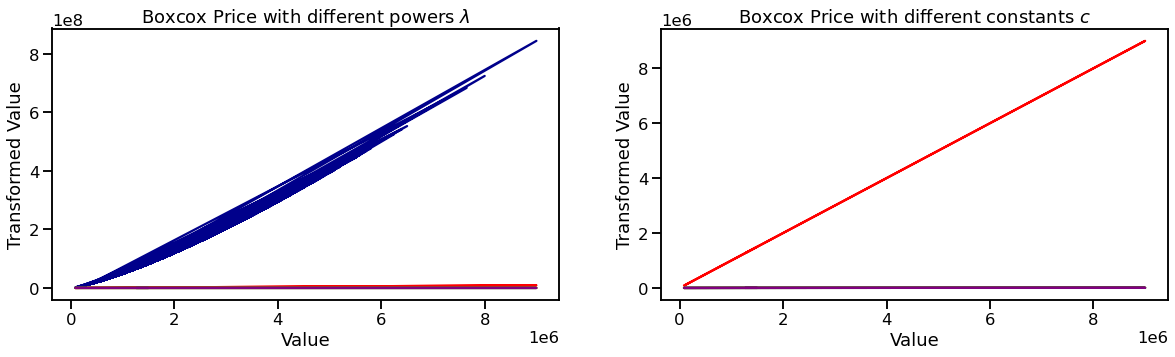

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Identidad
k = ax[0].plot(Price, Price, color="Red", label="to_knead")

e1 = ax[0].plot(Price, boxcox(Price + 0.01, 1.3), color="darkblue", label="1.3")
e2 = ax[0].plot(Price, boxcox(Price + 0.01, 0.7), color="orange", label="0.7")
e3 = ax[0].plot(Price, boxcox(Price + 0.01, 0.5), color="green", label="0.5")
e4 = ax[0].plot(Price, boxcox(Price + 0.01, 0.01), color="purple", label="0.01")

ax[0].set_title("Boxcox Price with different powers $\lambda$")
ax[0].set_xlabel("Value")
ax[0].set_ylabel("Transformed Value")
handles = [k, e1, e2, e3, e4]

# Identidad
k = ax[1].plot(Price, Price, color="Red", label="to_knead")

e1 = ax[1].plot(Price, boxcox(Price + 0.01, 0.5), color="darkblue", label="0.01")
e2 = ax[1].plot(Price, boxcox(Price + 0.5, 0.5), color="orange", label="0.5")
e3 = ax[1].plot(Price, boxcox(Price + 1, 0.5), color="green", label="1")
e4 = ax[1].plot(Price, boxcox(Price + 1.5, 0.5), color="purple", label="1.5")

ax[1].set_title("Boxcox Price with different constants $c$")
ax[1].set_xlabel("Value")
ax[1].set_ylabel("Transformed Value")
handles = [k, e1, e2, e3, e4]

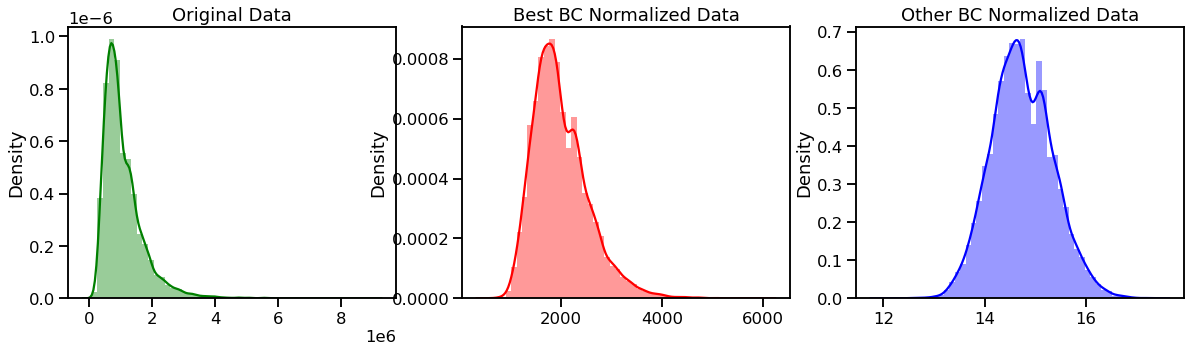

In [19]:
# Veamos que tan normal es la distribución
Best_BC = boxcox(Price + 1, 0.5)
Other_BC = boxcox(Price + 0.01, 0.01)

# Plot both together to compare
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.distplot(Price, ax=ax[0], color='Green')
ax[0].set_title("Original Data");

sns.distplot(Best_BC, ax=ax[1], color='Red')
ax[1].set_title("Best BC Normalized Data");

sns.distplot(Other_BC, ax=ax[2], color='Blue')
ax[2].set_title("Other BC Normalized Data");